### Random Forest Classifier

### Predict the on set of diabetes based on diagnostic measures

### Context:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content:
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### About this dataset:
The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


Features	                    Description

Pregnancies	                    Number of times pregnant

Glucose	                        Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure	                Diastolic blood pressure (mm Hg)

SkinThickness	                Triceps skin fold thickness (mm)

Insulin	                        2-Hour serum insulin (mu U/ml)

BMI	                            Body mass index (weight in kg/(height in m)^2)

Diabetes	                    PedigreeFunctionDiabetes pedigree function

Age	                            Age (years)

Outcome	                        Class variable (0 or 1)
                                268 of 768 are 1, the others are 0

In [1]:
#Read Datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df=pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# DataFrame stores the number of rows and columns as a tuple (number of rows, number of columns) 
df.shape

(768, 9)

In [5]:
# isnull(). sum() will give the column-wise sum of missing values.
#This returns the counts of non-NA, NA and total number of entries per group.

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Descriptive statistics include those that summarize the central tendency, 
#dispersion and shape of a dataset’s distribution, excluding NaN values.

df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


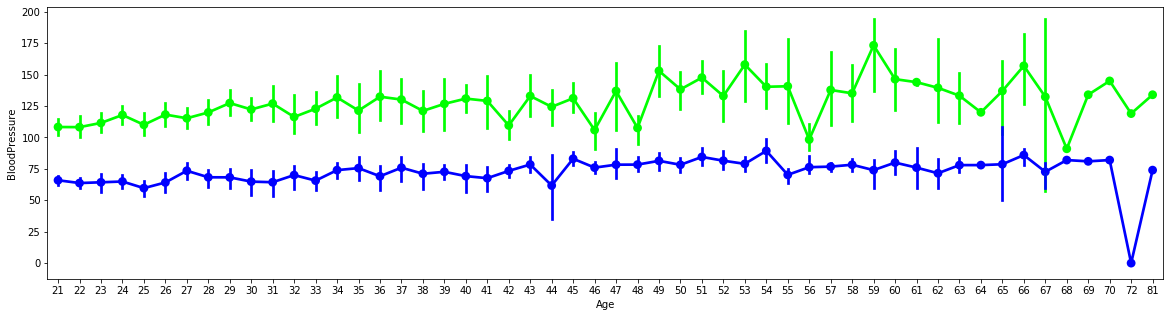

In [8]:
#figure() is to create a figure object. 
#The whole figure is regarded as the figure object. It is necessary to explicitly use plt
#The figsize attribute allows us to specify the width and height of a figure in unit inches
plt.figure(figsize=(20,5))




#A point plot represents an estimate of central tendency for a numeric variable by 
#the position of scatter plot points and provides some indication of the uncertainty around
#that estimate using error bars.
sns.pointplot(x='Age',y='Glucose',data=df,color='lime',alpha=0.8)
sns.pointplot(x='Age',y='BloodPressure',data=df,color='blue',alpha=0.8)


In [9]:
X=df.drop('Outcome',axis=1)
Y=df['Outcome']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
Y_pred=rfc.predict(X_test)


In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7402597402597403